In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
puppy_full = cv2.imread('data/puppy.jpg')
puppy_full = cv2.cvtColor(puppy_full, cv2.COLOR_BGR2RGB)

In [6]:
puppy_full.shape

(1024, 1024, 3)

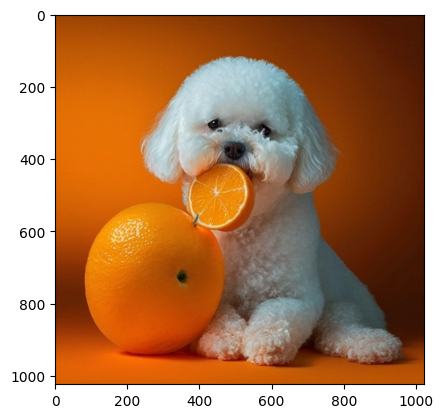

In [3]:
plt.imshow(puppy_full)

In [4]:
puppy_face = cv2.imread('data/puppy_face.jpg')
puppy_face = cv2.cvtColor(puppy_face, cv2.COLOR_BGR2RGB)

In [7]:
puppy_face.shape

(386, 571, 3)

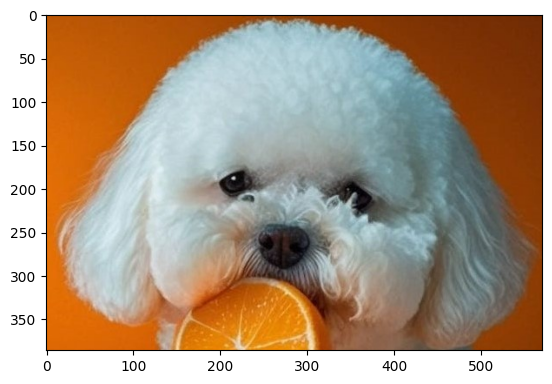

In [5]:
plt.imshow(puppy_face)

In [8]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

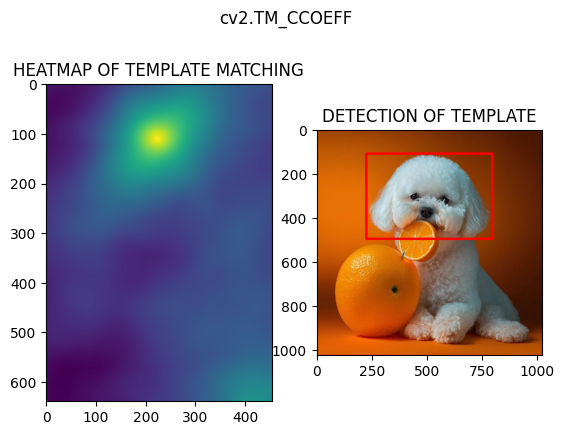

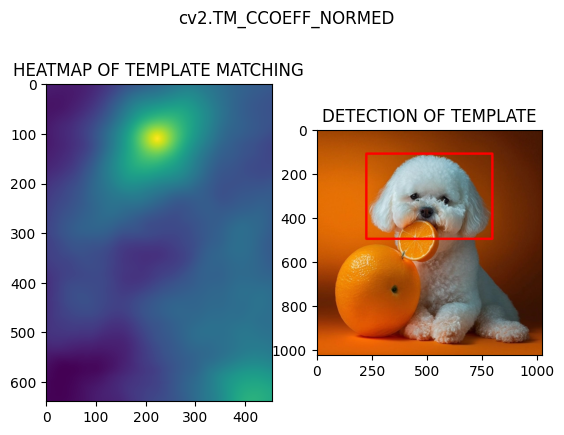

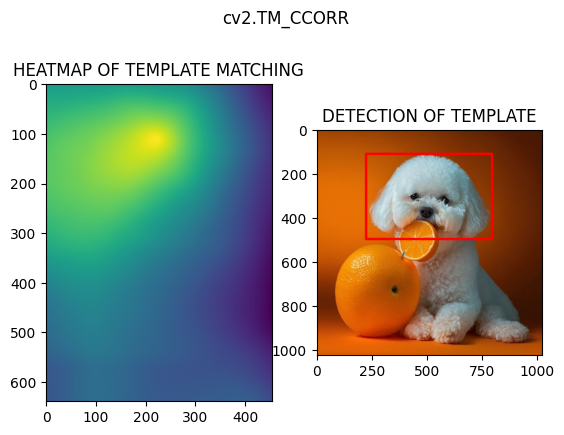

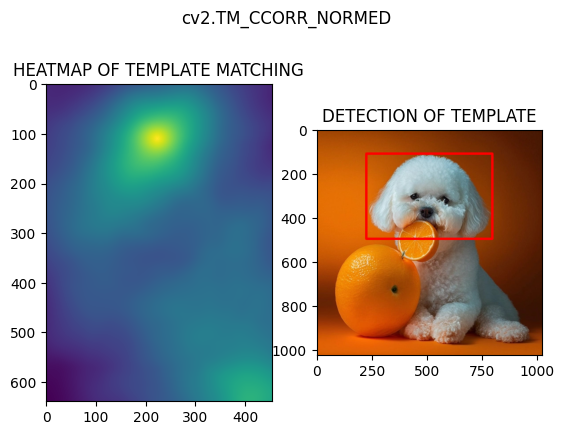

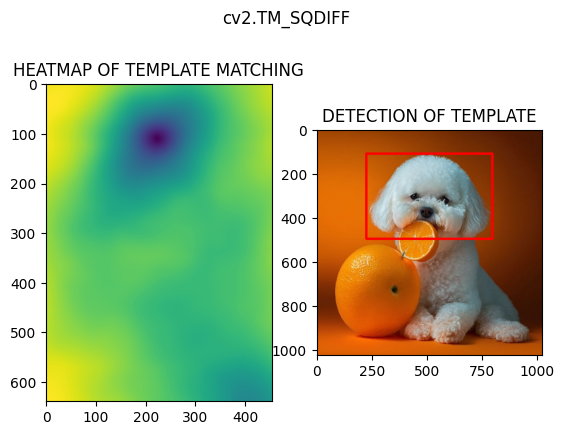

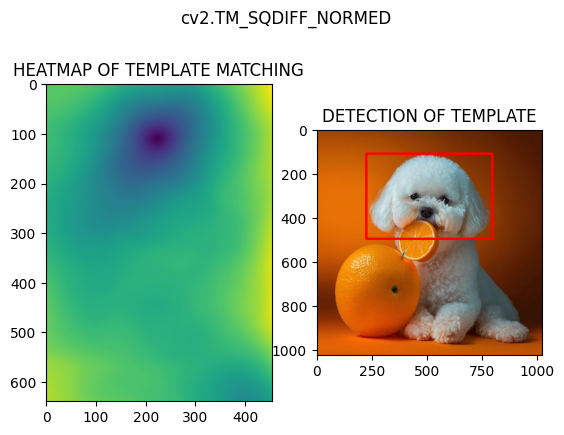

In [12]:
for m in methods:
    puppy_full_copy = puppy_full.copy()

    method = eval(m)

    res = cv2.matchTemplate(puppy_full_copy, puppy_face, method)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    height, width, _ = puppy_face.shape

    bottom_right = (top_left[0]+width, top_left[1]+height)

    cv2.rectangle(puppy_full_copy, top_left, bottom_right, (255, 0, 0), 10)

    plt.subplot(121)
    plt.imshow(res)
    plt.title("HEATMAP OF TEMPLATE MATCHING")

    plt.subplot(122)
    plt.imshow(puppy_full_copy)
    plt.title("DETECTION OF TEMPLATE")

    plt.suptitle(m)
    plt.show()
    print("\n\n")